In [1]:
####Assignment of Advanced Regression for house price predictions Using Ridge and Lasso algorithm

In [2]:
# Importing libraries
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [3]:
#reading the dataset
housePrice=pd.read_csv('train.csv')
housePrice.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [4]:
housePrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housePrice.shape

(1460, 81)

In [6]:
housePrice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
# Data Cleaning - Missing Value, Duplicates, Imputing, Dropping, Deleting, Exploration

In [9]:
#Cleaning up variable Alley (Replacing NA => No Alley Access)
housePrice['Alley'].replace({np.nan:'No Alley Access'},inplace=True)
100*(housePrice['Alley'].value_counts()/housePrice['Alley'].count())

No Alley Access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64

In [10]:
# As 94% of Alley is "No Alley access" it can be dropped
housePrice=housePrice.drop(['Alley'],axis=1)

In [11]:
#Checking the dataset for the amount of nulls present
round(housePrice.isnull().sum()/len(housePrice.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
dtype: float64

In [12]:
#Considering 10% as my threshold and dropping the column
round(housePrice.isnull().sum()/len(housePrice.index),2)[round(housePrice.isnull().sum()/len(housePrice.index),2).values>0.10]

LotFrontage    0.18
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [13]:
housePrice = housePrice.drop(['LotFrontage','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

In [14]:
#verifying the columns for the missing values between 0-10%
round(housePrice.isnull().sum()/len(housePrice.index),2)[round(housePrice.isnull().sum()/len(housePrice.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [15]:
#convert the Year columns with the age to fill these columns with number
housePrice['YearBuiltOld'] = housePrice.YearBuilt.max()-housePrice.YearBuilt
housePrice['YearRemodAddOld'] = housePrice.YearRemodAdd.max()-housePrice.YearRemodAdd
housePrice['GarageYrBltOld'] = housePrice.GarageYrBlt.max()-housePrice.GarageYrBlt
housePrice['YrSoldOld'] = housePrice.YrSold.max()-housePrice.YrSold
housePrice[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuiltOld','YearRemodAddOld','GarageYrBltOld','YrSoldOld']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuiltOld,YearRemodAddOld,GarageYrBltOld,YrSoldOld
484,1962,2001,1963.0,2007,48,9,47.0,3
1015,2001,2001,2001.0,2009,9,9,9.0,1
1131,1991,1992,NaN,2007,19,18,NaN,3
406,1936,1950,1936.0,2008,74,60,74.0,2
1069,1949,2003,1985.0,2007,61,7,25.0,3
88,1915,1982,NaN,2009,95,28,NaN,1
174,1986,1986,1986.0,2008,24,24,24.0,2
592,1982,2003,1985.0,2008,28,7,25.0,2
205,1990,1990,1990.0,2009,20,20,20.0,1
651,1940,1950,1940.0,2009,70,60,70.0,1


In [16]:
#Lets drop original Year columns
housePrice = housePrice.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [17]:
#Imputing Missing values
housePrice.MasVnrType.fillna('None',inplace=True)
housePrice.MasVnrArea.fillna(housePrice.MasVnrArea.mean(),inplace=True)
housePrice.BsmtQual.fillna('TA',inplace=True)
housePrice.BsmtCond.fillna('TA',inplace=True)
housePrice.BsmtExposure.fillna('No',inplace=True)
housePrice.BsmtFinType1.fillna('Unf',inplace=True)
housePrice.BsmtFinType2.fillna('Unf',inplace=True)
housePrice.GarageType.fillna('Attchd',inplace=True)
housePrice.GarageFinish.fillna('Unf',inplace=True)
housePrice.GarageQual.fillna('TA',inplace=True)
housePrice.GarageCond.fillna('TA',inplace=True)
housePrice.GarageYrBltOld.fillna(-1,inplace=True)

In [18]:
#dropping Id, street and utilities as no impact
housePrice = housePrice.drop(['Id','Street','Utilities'],axis='columns')

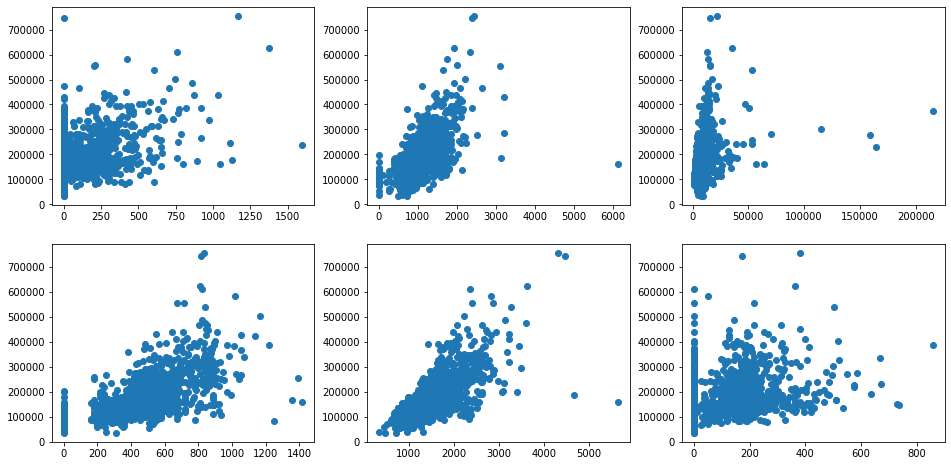

In [19]:
#EDA Analysis with graphs
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housePrice.MasVnrArea,housePrice.SalePrice)
plt.subplot(2,3,2)
plt.scatter(housePrice.TotalBsmtSF,housePrice.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housePrice['LotArea'],housePrice.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housePrice['GarageArea'],housePrice.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housePrice['GrLivArea'],housePrice.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housePrice['WoodDeckSF'],housePrice.SalePrice)

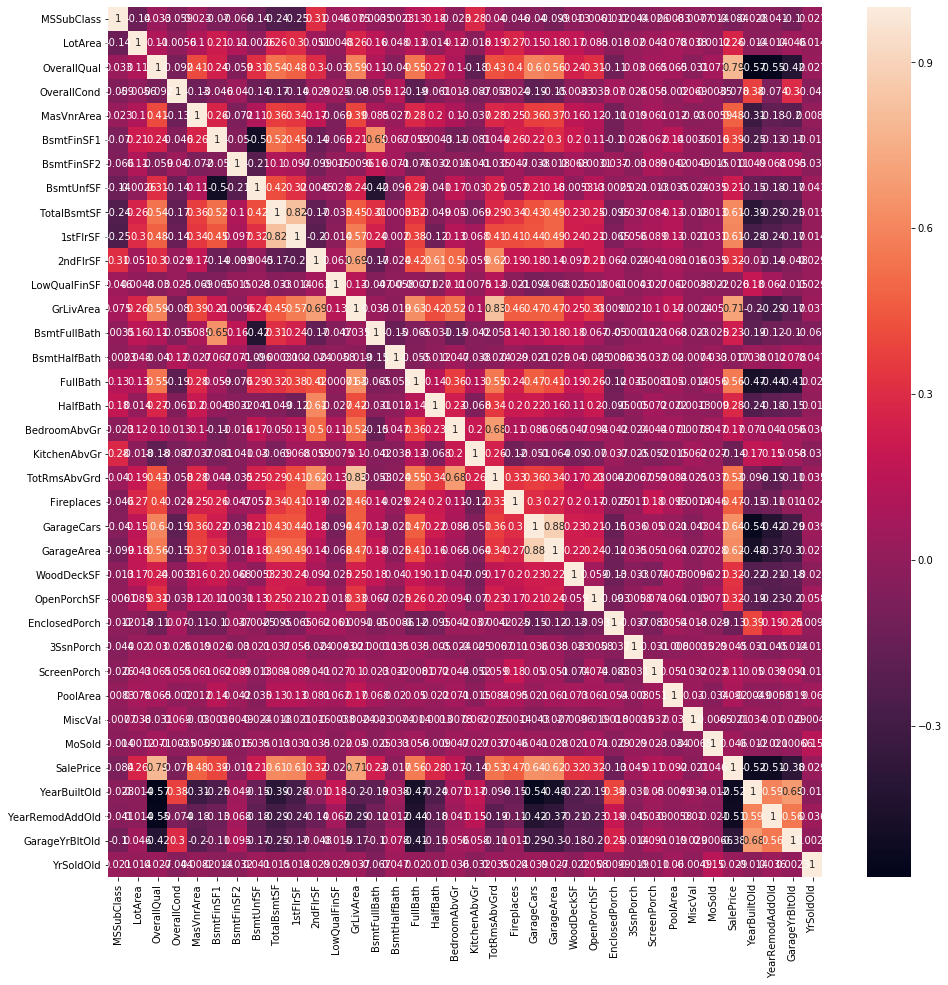

In [20]:
plt.figure(figsize=(16,16))
sns.heatmap(housePrice[list(housePrice.dtypes[housePrice.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [21]:
#Handling the outliers by considering the lower and upper quantile as 0.25 & 0.99 
housePrice.shape

(1460, 72)

In [22]:
numCol = list(housePrice.dtypes[housePrice.dtypes !='object'].index)
numCol = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def dropOutliers(x):
    list = []
    for col in numCol:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housePrice = dropOutliers(housePrice)

In [23]:
housePrice.shape
housePrice[list(housePrice.dtypes[housePrice.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [24]:
#Below columns have some kind of order and hence check ordinal in nature
housePrice[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
             'CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [25]:
housePrice['LandSlope'] = housePrice.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housePrice['ExterQual'] = housePrice.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housePrice['BsmtQual'] = housePrice.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housePrice['BsmtCond'] = housePrice.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housePrice['BsmtExposure'] = housePrice.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housePrice['BsmtFinType1'] = housePrice.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housePrice['BsmtFinType2'] = housePrice.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housePrice['HeatingQC'] = housePrice.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housePrice['CentralAir'] = housePrice.CentralAir.map({'N':0,'Y':1})
housePrice['KitchenQual'] = housePrice.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housePrice['GarageFinish'] = housePrice.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housePrice['GarageQual'] = housePrice.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housePrice['GarageCond'] = housePrice.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housePrice['ExterCond'] = housePrice.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housePrice['LotShape'] = housePrice.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [26]:
#check converted columns
housePrice[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
             'CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [27]:
#Filling dummy column with the actual dataset
dummyCol = pd.get_dummies(housePrice[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Heating','Electrical',
             'Functional','GarageType','PavedDrive','SaleType','SaleCondition']],drop_first=True)

housePrice = pd.concat([housePrice,dummyCol],axis='columns')

housePrice = housePrice.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Heating',
             'Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

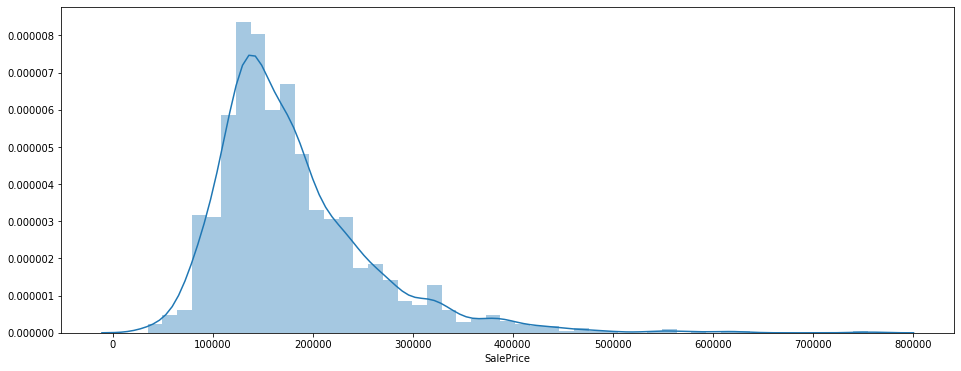

In [28]:
#verify the distribution of target variable
plt.figure(figsize=(16,6))
sns.distplot(housePrice.SalePrice)
plt.show()

In [29]:
#Creating train and test dataset for verification
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(housePrice,train_size=0.7,test_size=0.3,random_state=42)

housePrice[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
            'CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [30]:
#Scaling the train dataset with dependent variable
from sklearn.preprocessing import StandardScaler

numCol = ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
          '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
          'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
          '3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[numCol] = scaler.fit_transform(df_train[numCol])
df_test[numCol] = scaler.transform(df_test[numCol])

E:\Python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
E:\Python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
E:\Python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

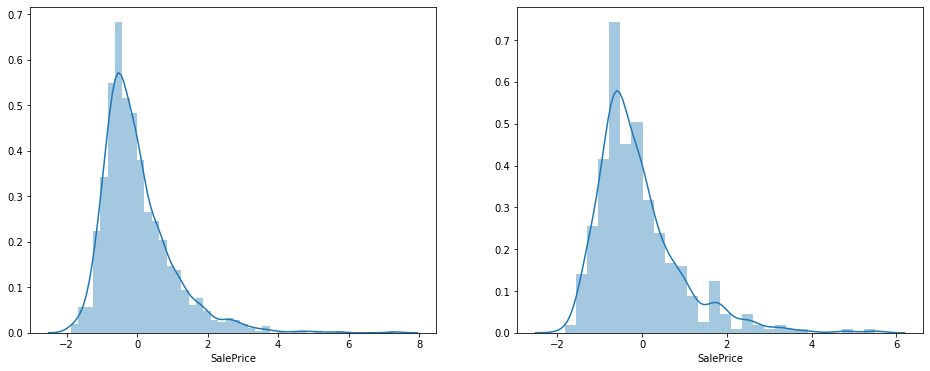

In [31]:
#check the distribution
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [32]:
#Spliting the dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [36]:
#Model Building with Ridge
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011098,0.002158,0.002798,0.000749,0.0001,{'alpha': 0.0001},-0.265123,-0.261952,-0.264238,-0.262250,...,-0.259961,0.006978,27,-0.173578,-0.171705,-0.177002,-0.172952,-0.179412,-0.174930,0.002847
1,0.009395,0.001958,0.002002,0.000898,0.001,{'alpha': 0.001},-0.265082,-0.261806,-0.263586,-0.262232,...,-0.259785,0.006895,26,-0.173590,-0.171713,-0.177020,-0.172964,-0.179413,-0.174940,0.002845
2,0.009195,0.001165,0.001799,0.000400,0.01,{'alpha': 0.01},-0.264665,-0.260399,-0.259405,-0.262052,...,-0.258506,0.006509,25,-0.173711,-0.171796,-0.177153,-0.173081,-0.179430,-0.175034,0.002824
3,0.009994,0.000632,0.002198,0.000400,0.05,{'alpha': 0.05},-0.262884,-0.255670,-0.253107,-0.261137,...,-0.255674,0.006175,24,-0.174196,-0.172165,-0.177473,-0.173492,-0.179502,-0.175366,0.002708
4,0.008995,0.001095,0.001798,0.000400,0.1,{'alpha': 0.1},-0.260970,-0.251136,-0.249643,-0.259923,...,-0.253540,0.005886,23,-0.174691,-0.172710,-0.177765,-0.173860,-0.179633,-0.175732,0.002572


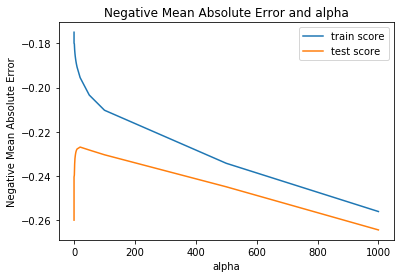

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
model_cv.best_params_

{'alpha': 20}

In [50]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#Predictor Variables from the Model built using Ridge Regression:
ridge.coef_

array([-6.94874307e-02,  6.83512111e-02,  1.91163796e-02, -1.02702444e-02,
        1.69177621e-01,  7.59735368e-02,  9.37878124e-02,  1.00951315e-01,
       -1.11529249e-02,  8.27290150e-02, -1.35542545e-02,  6.58750835e-02,
        1.60753428e-03,  9.21320034e-02,  1.17982760e-02,  5.08248498e-03,
       -1.53962364e-02,  8.21954396e-02,  4.63484144e-03, -3.54677093e-02,
        6.39963352e-02,  1.46891973e-01,  1.08964374e-02,  1.72539399e-01,
        2.06440938e-02, -5.02669431e-03,  2.59694899e-02,  1.97819805e-02,
       -5.03812058e-02, -4.04939921e-02,  8.95019648e-02,  7.21267497e-02,
        2.40734374e-02,  1.36170197e-02,  4.83059580e-03,  6.85625925e-02,
        6.16986069e-02, -2.45860787e-02,  2.28999932e-02, -1.30097967e-02,
        1.35028841e-02,  7.58619451e-03,  3.36025838e-02,  0.00000000e+00,
       -4.07271359e-03, -1.02827315e-02, -1.85121795e-03, -1.64410803e-04,
       -9.60771185e-04,  6.91584564e-03,  2.08214420e-02,  3.49275831e-02,
        4.82259423e-02, -

In [53]:
#R-squared value of test and train data
from sklearn import metrics
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9031439595017332


In [54]:
####Best alpha value for Ridge : {'alpha': 0.9}
#Build model with Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13920341294216598, tolerance: 0.0834479486660015
  positive)
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.147509,3.312605e-02,0.001799,3.998281e-04,0.0001,{'alpha': 0.0001},-0.256802,-0.246303,-0.242781,-0.256979,...,-0.248934,0.006664,3,-0.176231,-0.173695,-0.179131,-0.174799,-0.180554,-0.176882,0.002587
1,0.075354,1.395784e-02,0.001599,4.898045e-04,0.001,{'alpha': 0.001},-0.233324,-0.223177,-0.211820,-0.235320,...,-0.226860,0.008583,1,-0.186945,-0.186276,-0.193605,-0.183540,-0.189068,-0.187887,0.003361
2,0.015390,1.958292e-03,0.001799,7.478695e-04,0.01,{'alpha': 0.01},-0.247667,-0.218050,-0.237385,-0.248262,...,-0.241232,0.012886,2,-0.225566,-0.231231,-0.227120,-0.220794,-0.219036,-0.224749,0.004395
3,0.012792,3.865033e-03,0.001999,6.322590e-04,0.05,{'alpha': 0.05},-0.259998,-0.247298,-0.249646,-0.272553,...,-0.262840,0.014157,4,-0.256524,-0.259968,-0.257178,-0.252306,-0.251686,-0.255532,0.003117
4,0.008795,1.165215e-03,0.001399,4.897269e-04,0.1,{'alpha': 0.1},-0.271012,-0.282834,-0.268440,-0.301638,...,-0.287452,0.017513,5,-0.281803,-0.285658,-0.279306,-0.279326,-0.276347,-0.280488,0.003110
5,0.008395,4.888698e-04,0.001599,4.892985e-04,0.2,{'alpha': 0.2},-0.323038,-0.357790,-0.319121,-0.370142,...,-0.350802,0.025732,6,-0.346546,-0.351863,-0.340550,-0.344327,-0.341038,-0.344865,0.004132
6,0.008395,1.019244e-03,0.001599,8.003594e-04,0.3,{'alpha': 0.3},-0.380781,-0.428310,-0.396566,-0.441922,...,-0.422165,0.030024,7,-0.414311,-0.421591,-0.414873,-0.420335,-0.416378,-0.417498,0.002936
7,0.007196,9.786937e-04,0.001599,4.890259e-04,0.4,{'alpha': 0.4},-0.438975,-0.461753,-0.455459,-0.492691,...,-0.474587,0.030340,8,-0.471688,-0.463570,-0.473373,-0.470118,-0.477956,-0.471341,0.004688
8,0.006596,4.897466e-04,0.001599,4.895324e-04,0.5,{'alpha': 0.5},-0.490768,-0.504267,-0.512093,-0.545215,...,-0.527081,0.033352,9,-0.520227,-0.513595,-0.525506,-0.522569,-0.534758,-0.523331,0.006933
9,0.007795,7.482523e-04,0.001998,6.321838e-04,0.6,{'alpha': 0.6},-0.539661,-0.552866,-0.558835,-0.578603,...,-0.564646,0.019086,14,-0.568432,-0.569955,-0.566483,-0.555982,-0.544041,-0.560979,0.009781


In [56]:
#R-squared value 
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13920341294216598, tolerance: 0.0834479486660015
  positive)
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [57]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.144710,6.498708e-02,0.002399,4.899015e-04,0.0001,{'alpha': 0.0001},0.845479,0.735666,0.718874,0.859051,...,0.813909,0.074361,3,0.933836,0.940767,0.941806,0.930769,0.921897,0.933815,0.007260
1,0.071556,1.157906e-02,0.001998,3.504023e-07,0.001,{'alpha': 0.001},0.877687,0.813717,0.723903,0.880250,...,0.841065,0.066571,1,0.924888,0.931371,0.931378,0.923389,0.912687,0.924743,0.006858
2,0.013792,1.600295e-03,0.001799,3.997327e-04,0.01,{'alpha': 0.01},0.849695,0.882918,0.689266,0.873204,...,0.834455,0.073566,2,0.872141,0.864968,0.900466,0.868359,0.861567,0.873500,0.013933
3,0.010394,1.742979e-03,0.001999,6.324853e-04,0.05,{'alpha': 0.05},0.819859,0.841819,0.715863,0.843521,...,0.811363,0.048534,4,0.836481,0.830801,0.861338,0.828637,0.818858,0.835223,0.014243
4,0.011794,1.325800e-03,0.002997,2.463915e-06,0.1,{'alpha': 0.1},0.795940,0.794145,0.721199,0.801594,...,0.780338,0.029880,5,0.805588,0.798834,0.828997,0.793946,0.786443,0.802762,0.014531
5,0.011193,7.475394e-04,0.002398,4.894150e-04,0.2,{'alpha': 0.2},0.720615,0.669576,0.688790,0.696435,...,0.691985,0.016795,6,0.716203,0.712174,0.740379,0.705581,0.692403,0.713348,0.015743
6,0.011193,3.997335e-04,0.002399,4.895706e-04,0.3,{'alpha': 0.3},0.640504,0.539310,0.598020,0.573113,...,0.583819,0.033970,7,0.610053,0.612333,0.624652,0.592557,0.571062,0.602131,0.018606
7,0.008195,1.165280e-03,0.001799,7.479460e-04,0.4,{'alpha': 0.4},0.558960,0.480823,0.501656,0.479635,...,0.496014,0.034313,8,0.509801,0.541257,0.521817,0.507442,0.463803,0.508824,0.025497
8,0.008795,1.164560e-03,0.001798,3.994466e-04,0.5,{'alpha': 0.5},0.480718,0.405404,0.386551,0.376394,...,0.397626,0.046941,9,0.417838,0.452063,0.427038,0.410822,0.354522,0.412457,0.032154
9,0.009394,1.018552e-03,0.002398,7.992510e-04,0.6,{'alpha': 0.6},0.397721,0.310122,0.284313,0.307040,...,0.323232,0.038863,10,0.319620,0.343051,0.346977,0.344978,0.334818,0.337889,0.010027


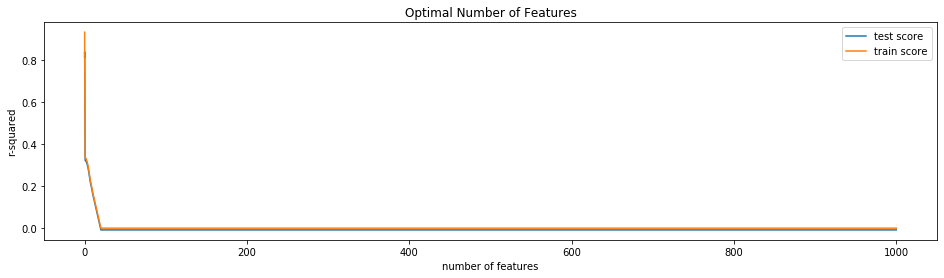

In [58]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [60]:
#value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.22686016003961607


In [ ]:
###Best alpha value for Lasso : {'alpha': 0.001}
###Best alpha value for Ridge : {'alpha': 0.9}